# Introducción

En este ejercicio implementamos un modelo de regresión lineal para predecir la calidad del vino tinto basándonos en sus características fisicoquímicas. El objetivo es encontrar qué variables tienen mayor influencia en la calidad del vino y desarrollar un modelo predictivo preciso.

Utilizamos dos enfoques diferentes:
1. Implementación manual del algoritmo de **Gradiente Descendente** para minimizar el error cuadrático medio (MSE).
2. Uso de la biblioteca **scikit-learn** con su implementación de `LinearRegression`.

Para evaluar el rendimiento del modelo, utilizamos técnicas como la de dividir el dataset en entrenamiento y validación y métricas como el MSE (Mean Squared Error) para medir la precisión de las predicciones.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
# cargar dataset
df = pd.read_csv("./Datasets/winequality-red.csv", sep=";")              # este dataset esta separado por ";"
print(df.head()) # muestra las primeras filas para verificar que se cargó bien
print(df.info()) # muestra que tipo de datos son y si hay datos nulos.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

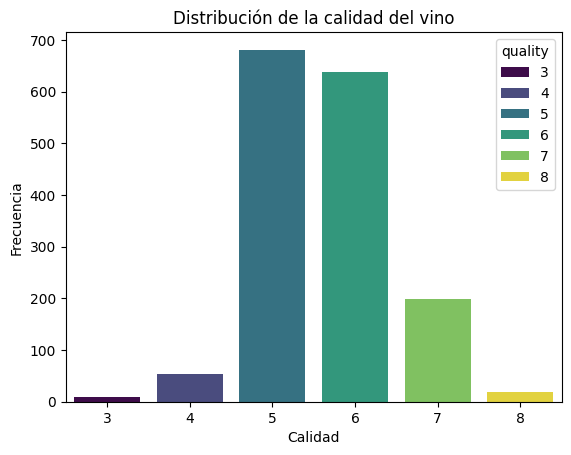

In [3]:
# calidad de la variable objetivo
sns.countplot(x="quality", data=df, hue="quality", palette="viridis")
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# separar variables predictoras (features) y target
X = df.drop("quality", axis=1) # X son las variables predictoras (todas menos quality).
y = df["quality"].values.reshape(-1, 1) # y es la variable objetivo (calidad).

# escalado de datos para usar gradiente descendente, que una variable no valga mas por tener mas peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# agregar columna de 1s para el bias
m = X_scaled.shape[0]
X_b = np.c_[np.ones((m, 1)), X_scaled]

# inicialización de parámetros
n_features = X_b.shape[1]
theta = np.zeros((n_features, 1))                               
eta = 0.01 # tasa de aprendizaje
n_iter = 500                                                   

# gradiente descendente de manera manual que va guardando un historial del mse para luego imprimirlo
mse_history = []
for iteration in range(n_iter):
    gradients = (1/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    mse_iter = mean_squared_error(y, X_b @ theta)
    mse_history.append(mse_iter)

# prediccion, multiplicacion de datos con los datos que encontro
y_pred = X_b @ theta

# metrica usada mse
mse = mean_squared_error(y, y_pred)
print("\nResultados del modelo con gradiente descendente:")
print("Theta finales (bias + coeficientes):")
print(theta.ravel())
print(f"MSE: {mse:.4f}")


Resultados del modelo con gradiente descendente:
Theta finales (bias + coeficientes):
[ 5.59899112e+00  5.99827023e-02 -1.78273082e-01 -1.13058194e-03
  3.30973859e-02 -9.09906438e-02  3.81259349e-02 -1.03649371e-01
 -6.94628616e-02 -3.86660012e-02  1.57722819e-01  2.67268103e-01]
MSE: 0.4188


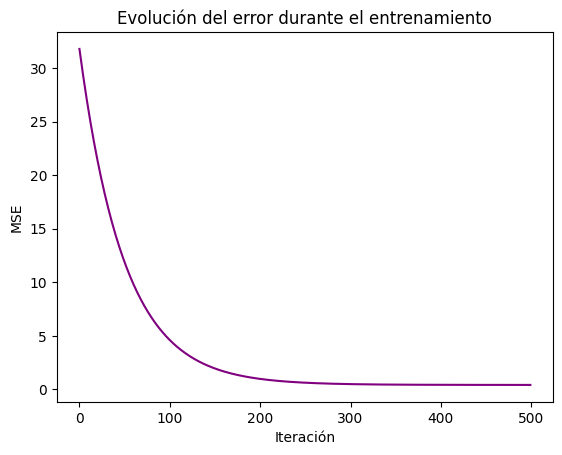

In [5]:
# curva de error durante el entrenamiento
plt.plot(mse_history, color="purple")
plt.xlabel("Iteración")
plt.ylabel("MSE")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

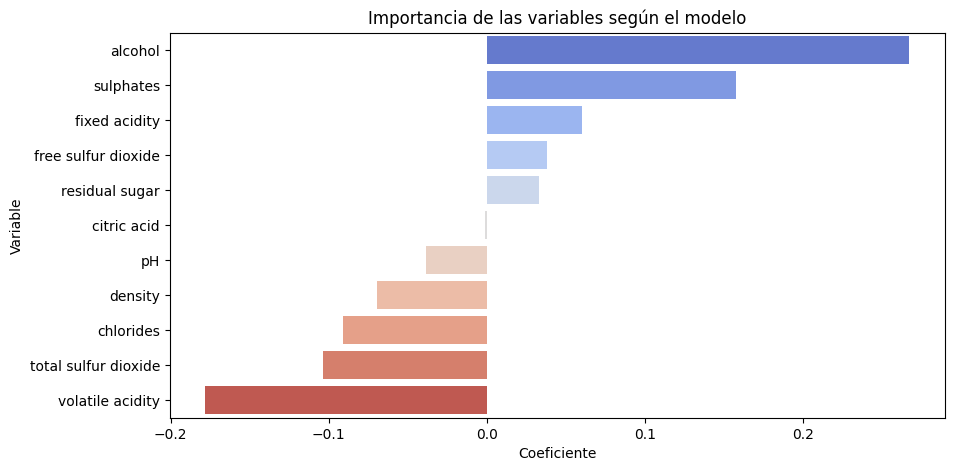

In [ ]:
# grafico de importancia de las variables respecto a la variable objetivo (calidad)
coef = theta[1:].ravel()  # excluye el bias (primer valor de theta)
features = df.drop("quality", axis=1).columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coeficiente": coef
})

plt.figure(figsize=(10,5))
sns.barplot(
    x="Coeficiente",
    y="Feature",
    hue="Feature",  # usamos la variable "Feature" como hue
    data=coef_df.sort_values(by="Coeficiente", ascending=False),
    palette="coolwarm",
    dodge=False,    # para que no se desplace cada barra
    legend=False    # oculta la leyenda innecesaria
)
plt.title("Importancia de las variables según el modelo")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()


Otra posible solucion es usar directamente linearRegresion() de sklearn

In [7]:
# separar variables predictoras (features) y target
X = df.drop("quality", axis=1) # X son las variables predictoras (todas menos quality).
y = df["quality"].values.reshape(-1, 1) # y es la variable objetivo (calidad).

# división en entrenamiento y validación
test_size=0.3   # el 30% se reserva para validación, 70% para entrenar.
random_state=42 # fija la semilla para obtener siempre la misma separación (reproducibilidad).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# escalado de datos para usar gradiente descendente, que una variable no valga mas por tener mas peso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)         

# entrenamiento del modelo
lin_reg = LinearRegression()

# entrenamos con los datos escalados y las etiquetas de entrenamiento
lin_reg.fit(X_train_scaled, y_train)

# predicción, con los datos escalados tambien, tanto datos de entrenamiento y de validacion para ver si hay under/overfitting
y_train_pred = lin_reg.predict(X_train_scaled)
y_val_pred = lin_reg.predict(X_val_scaled)

# evaluación tanto de entrenamiento y validacion
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print("MSE (entrenamiento):", mse_train)
print("MSE (validación/prueba):", mse_val)

MSE (entrenamiento): 0.4207866492123616
MSE (validación/prueba): 0.4112348717504195


# Conclusión

Implementamos dos enfoques distintos para la regresión lineal: uno manual usando gradiente descendente y otro utilizando scikit-learn. Ambos modelos lograron ajustarse a los datos, aunque con diferentes niveles de complejidad en su implementación.

Los resultados muestran que:
1. La implementación manual con gradiente descendente convergió exitosamente, como se puede observar en la gráfica de evolución del error.
2. El análisis de coeficientes reveló qué características químicas tienen mayor influencia en la calidad del vino.
3. La evaluación del modelo con un conjunto de entrenamiento y validación permitió analizar su capacidad de generalización. Los resultados similares en ambos conjuntos indican que el modelo no presenta signos de sobreajuste y logra un buen equilibrio entre ajuste y simplicidad.